In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def log_inv_sensor_model(z,c):
    if c > z-10:
        return np.log(0.6/(1-0.6))
    return np.log(0.3/(1-0.3))

In [39]:
c=range(0,201,10)
logodds=np.zeros(len(c))
z=[101, 82, 91, 112, 99, 151, 96, 85, 99, 105]
prior=np.log(0.5/(1-0.5))


for i in range(len(z)):
    # updating every cell of the map
    for j in range(len(c)):
        # update the ones not beyond 20 cm (why not 20cm less?? issue clarify)
        if c[j]>z[i]+20:
            continue
        #print("c["+str(j)+"] : "+str(log_inv_sensor_model(z[i],c[j])))
        logodds[j] = log_inv_sensor_model(z[i], c[j]) + logodds[j] - prior

In [34]:
# Calculating p(x) from logodds
m = 1-1/(1+np.exp(logodds))
print(m)

[2.08997635e-04 2.08997635e-04 2.08997635e-04 2.08997635e-04
 2.08997635e-04 2.08997635e-04 2.08997635e-04 2.08997635e-04
 2.55421549e-03 2.77599394e-01 8.24787340e-01 8.79844441e-01
 5.91240876e-01 3.91304348e-01 3.00000000e-01 6.00000000e-01
 6.00000000e-01 6.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01]


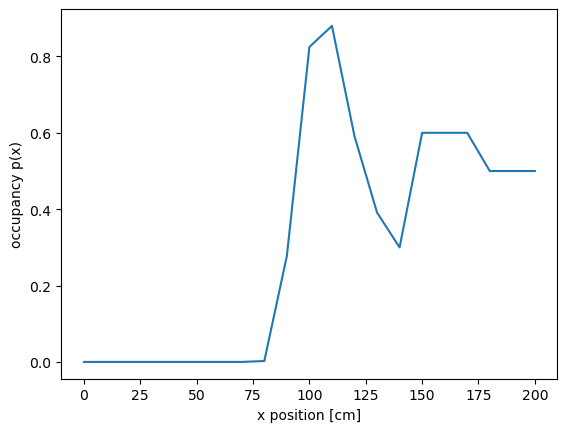

In [37]:
plt.plot(c,m)
plt.xlabel("x position [cm]")
plt.ylabel("occupancy p(x)")
plt.show()